In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("brd.jpeg")
img3 = cv2.imread("flock3.jpeg")
img2= cv2.imread("flock2.jpeg")

In [6]:

if (img.shape[:2])==(126,189):
    v=1
if (img.shape[:2])==(183, 275):
    v=2
if (img.shape[:2])==(168, 300):
    v=3

Label 	Largest side
    1          1.000
    2         66.000
    3          1.000
    4        120.000
    5         79.000
    6        102.000
    7        125.000
    8        105.000
    9         83.000
   10         80.000
   11         77.000
   12         85.000
   13         81.000
   14          1.000
   15        104.000
   16         74.000
   17          1.000
   18        119.000
   19        114.000
   20        119.000
   21         19.000
   22         91.000
   23         25.000
   24         48.000
   25         76.000
   26         28.000
   28        100.000
   30        117.000
   31         39.000
   32        122.000
   33         53.000
   34          1.000
   35         85.000
   36        100.000
   37          1.000
   38        117.000
   39        102.000
   40         81.000
   41          1.000
   42        111.000
   43         56.000
   44         22.000
   45        111.000
   46        123.000
   47          1.000
   48          1.000
   50         

NameError: name 'blobs' is not defined

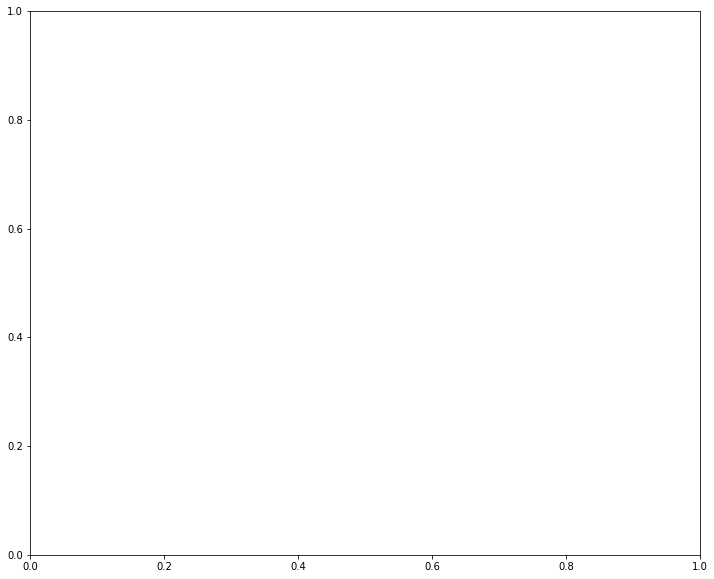

In [14]:
from skimage.measure import regionprops

img2= cv2.imread("flock2.jpeg",0)
labels=img2
properties = regionprops(labels)
print ('Label \tLargest side')
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    print ('%5d %14.3f' % (p.label, max(max_row - min_row, max_col - min_col)))

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)    
ax.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.gist_rainbow) 
ax.set_title('Labeled objects')
plt.xticks([])
plt.yticks([])
for ri, ci, li in zip(r, c, range(1, nlabels+1)):
    ax.annotate(li, xy=(ci, ri), fontsize=24)
plt.show()

In [ ]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

# generate some lowpass-filtered noise as a test image
gen = np.random.RandomState(0)
img = gen.poisson(2, size=(512, 512))
img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
img -= img.min()
img /= img.max()

# use a boolean condition to find where pixel values are > 0.75
blobs = img > 0.75

# label connected regions that satisfy this condition
labels, nlabels = ndimage.label(blobs)

# find their centres of mass. in this case I'm weighting by the pixel values in
# `img`, but you could also pass the boolean values in `blobs` to compute the
# unweighted centroids.
r, c = np.vstack(ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T

# find their distances from the top-left corner
d = np.sqrt(r*r + c*c)

# plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].imshow(img)
ax[1].hold(True)
ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
for ri, ci, di in zip(r, c, d):
    ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
                   arrowprops={'arrowstyle':'<-', 'shrinkA':0})
    ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
                   textcoords='offset points', ha='center', va='top',
                   fontsize='x-large')
for aa in ax.flat:
    aa.set_axis_off()
fig.tight_layout()
plt.show()

#link `https://stackoverflow.com/questions/38598690/how-to-find-the-diameter-of-objects-using-image-processing-in-python

In [ ]:
m=dist_transform.max()
row,col=dist_transform.shape
for x in range(row):
    for y in range(col):
        if dist_transform[x][y]==m:
            cv2.circle(IMG,(x,y),7,(0,255,0),-1)
            cv2.imwrite(nn,IMG)
plt.imshow(nn)   

In [ ]:
dist_transform=cv2.distanceTransform(thresh1,cv2.DIST_L2,5)
disp(dist_transform)

In [ ]:
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation = cv2.dilate(img, kernel, iterations=3) 
  
cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0) 

In [ ]:
## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [ ]:
## filter by area
s1= 5
s2 = 50
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))
#Dots number: 23

In [ ]:
#cnts,hi = cv2.findContours(dist_transform, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
contours, hierarchy = cv2.findcontours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)(dist_transform,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
cv2.drawContours(IMG, [cnt], 0, (0,255,0), 3)
disp(IMG)

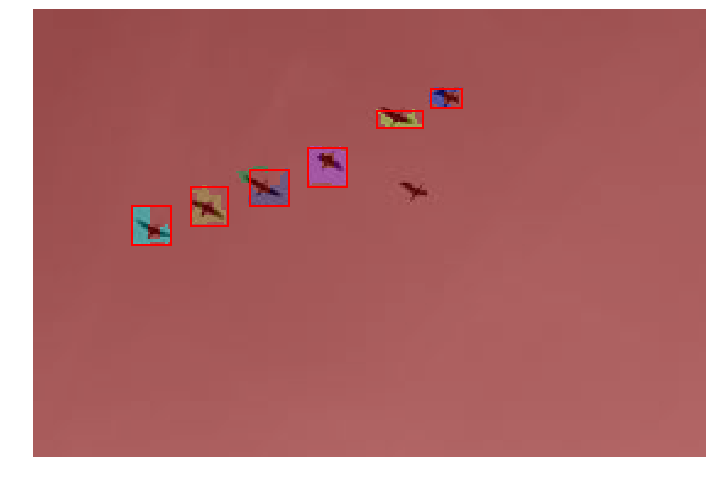

value of count is  6


In [27]:
#sk image documentation example to identify the coins in the image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

img2= cv2.imread("flock2.jpeg",0)
#image = data.coins()[50:-50, 50:-50]
image=img2

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(5))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 12))
ax.imshow(image_label_overlay)

count=0

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 40:
        # draw rectangle around segmented coins
        count=count+1
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()
print("value of count is ",count)

In [7]:
self.image = QLabel()
self.image.setPixmap(QPixmap("C:\\myImg.jpg"))
self.image.setObjectName("image")
self.image.mousePressEvent = self.getPos

def getPos(self , event):
    x = event.pos().x()
    y = event.pos().y() 

NameError: name 'QLabel' is not defined

In [6]:
self.img = QImage('fname.png')
pixmap = QPixmap(QPixmap.fromImage(self.img))
img_label = QLabel()
img_label.setPixmap(pixmap)
img_label.mousePressEvent = self.getPixel

def self.getPixel(self, event):
    x = event.pos().x()
    y = event.pos().y()
    c = self.img.pixel(x,y)  # color code (integer): 3235912
    # depending on what kind of value you like (arbitary examples)
    c_qobj = QColor(c)  # color object
    c_rgb = QColor(c).getRgb()  # 8bit RGBA: (255, 23, 0, 255)
    c_rgbf = QColor(c).getRgbf()  # RGBA float: (1.0, 0.3123, 0.0, 1.0)
    return x, y, c_rgb

SyntaxError: invalid syntax (<ipython-input-6-0ab7b83ae10e>, line 7)

In [15]:
from tkinter import *
def hello(event):
    print("Single Click, Button-l") 
def quit(event):                           
    print("Double Click, so let's stop") 
    import sys; sys.exit() 

widget = Button(None, text='Mouse Clicks')
widget.pack()
widget.bind('<Button-1>', hello)
widget.bind('<Double-1>', quit) 
widget.mainloop()

Single Click, Button-l
Single Click, Button-l


In [ ]:
#tells about the location of the mouse pointer within the image

from tkinter import *

def motion(event):
  print("Mouse position: (%s %s)" % (event.x, event.y))
  return

master = Tk()
whatever_you_do = "Whatever you do will be insignificant, but it is very important that you do it.\n(Mahatma Gandhi)"
msg = Message(master, text = whatever_you_do)
msg.config(bg='lightgreen', font=('times', 24, 'italic'))
msg.bind('<Motion>',motion)
msg.pack()
mainloop()

Mouse position: (52 157)
Mouse position: (52 154)
Mouse position: (52 147)
Mouse position: (52 142)
Mouse position: (52 132)
Mouse position: (52 127)
Mouse position: (53 117)
Mouse position: (53 108)
Mouse position: (53 101)
Mouse position: (53 89)
Mouse position: (53 78)
Mouse position: (53 66)
Mouse position: (52 57)
Mouse position: (49 51)
Mouse position: (43 42)
Mouse position: (38 37)
Mouse position: (30 25)
Mouse position: (25 20)
Mouse position: (19 12)
Mouse position: (16 8)
Mouse position: (13 3)
Mouse position: (251 0)
Mouse position: (250 1)
Mouse position: (250 2)
Mouse position: (249 2)
Mouse position: (248 3)
Mouse position: (248 5)
Mouse position: (247 6)
Mouse position: (245 7)
Mouse position: (244 10)
Mouse position: (243 11)
Mouse position: (242 13)
Mouse position: (241 14)
Mouse position: (240 16)
Mouse position: (240 18)
Mouse position: (239 19)
Mouse position: (238 20)
Mouse position: (237 23)
Mouse position: (236 24)
Mouse position: (235 26)
Mouse position: (234 2

Mouse position: (2 158)
Mouse position: (5 157)
Mouse position: (8 157)
Mouse position: (12 156)
Mouse position: (15 155)
Mouse position: (17 154)
Mouse position: (18 154)
Mouse position: (20 154)
Mouse position: (21 154)
Mouse position: (21 154)
Mouse position: (22 154)
Mouse position: (22 154)
Mouse position: (23 154)
Mouse position: (24 153)
Mouse position: (24 153)
Mouse position: (25 153)
Mouse position: (26 153)
Mouse position: (27 153)
Mouse position: (29 152)
Mouse position: (30 152)
Mouse position: (32 152)
Mouse position: (34 151)
Mouse position: (35 151)
Mouse position: (37 150)
Mouse position: (38 150)
Mouse position: (39 150)
Mouse position: (40 150)
Mouse position: (41 149)
Mouse position: (41 149)
Mouse position: (42 149)
Mouse position: (43 149)
Mouse position: (44 149)
Mouse position: (46 148)
Mouse position: (48 148)
Mouse position: (50 148)
Mouse position: (52 147)
Mouse position: (55 147)
Mouse position: (57 146)
Mouse position: (58 145)
Mouse position: (59 145)
Mou

Mouse position: (118 120)
Mouse position: (118 119)
Mouse position: (118 118)
Mouse position: (118 117)
Mouse position: (118 116)
Mouse position: (118 115)
Mouse position: (118 114)
Mouse position: (118 112)
Mouse position: (118 111)
Mouse position: (118 110)
Mouse position: (118 110)
Mouse position: (118 109)
Mouse position: (118 108)
Mouse position: (118 107)
Mouse position: (118 107)
Mouse position: (119 106)
Mouse position: (120 106)
Mouse position: (121 106)
Mouse position: (122 105)
Mouse position: (124 105)
Mouse position: (125 105)
Mouse position: (127 105)
Mouse position: (128 104)
Mouse position: (130 104)
Mouse position: (131 104)
Mouse position: (132 104)
Mouse position: (133 104)
Mouse position: (134 104)
Mouse position: (134 104)
Mouse position: (135 104)
Mouse position: (135 104)
Mouse position: (136 104)
Mouse position: (136 104)
Mouse position: (137 104)
Mouse position: (137 104)
Mouse position: (138 104)
Mouse position: (138 104)
Mouse position: (139 104)
Mouse positi

In [14]:
def pick_color(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pixel = image[y,x]
        color = pixel
        print (tuple(pixel)) # i tried converting to a tuple
        return color

In [15]:
import cv2
import matplotlib.pyplot as plt
img2= cv2.imread("flock2.jpeg")
while True:
    img2=cv2.resize(img2,(800,600))
    #print(pick_color)
    cv2.imshow('bird',img2)
    if cv2.waitKey(2) & 0xFF==27:
        break
cv2.destroyAllWindows()        

<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>
<function pick_color at 0x7f6b8d46b488>


<function pick_color at 0x7f6b8d46b048>


In [ ]:
skimage.measure.regionprops 